Step 2: Imports

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

Step 3: Load and Explore the Dataset

In [2]:
# Load the dataset
url = "../data/classification_dataset/wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
                "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue",
                "OD280/OD315 of diluted wines", "Proline"]

dataset = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
print(dataset.head())

# Print the column names
print("Column Names:", dataset.columns)

# Use the dataset for further analysis
X = dataset.drop('Class', axis=1)
y = dataset['Class']

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

Step 4: Data Preparation

In [3]:
# Assuming you have already loaded and split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 5: Data Standardization

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Step 6: kNN Modeling

In [5]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

Step 7: Make Predictions

In [6]:
y_pred_knn = knn_classifier.predict(X_test_scaled)

Step 8: Evaluate the kNN Model

In [7]:
print("kNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

kNN Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.86      0.92        14
           3       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36

Confusion Matrix:
 [[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


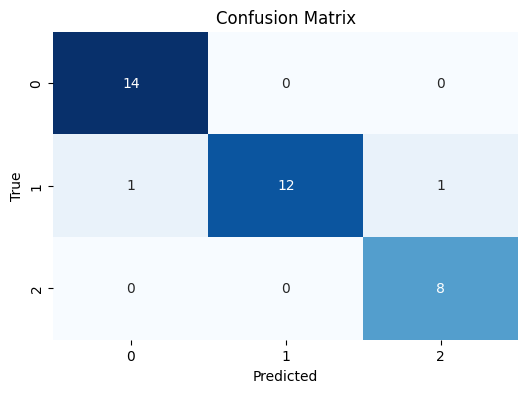

In [43]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('../plots/knn/confusion_matrix_knn.png')
plt.show()

#### Step 9: Hyperparameter Tuning

In [8]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # Minkowski distance parameter (1 for Manhattan, 2 for Euclidean)
}

In [9]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


In [10]:
best_knn_classifier = grid_search.best_estimator_

#### Step 10: Cross-Validation

Cross-Validation Scores: [1.         1.         0.96428571 0.96428571 0.96428571]
Mean CV Accuracy: 0.9785714285714286


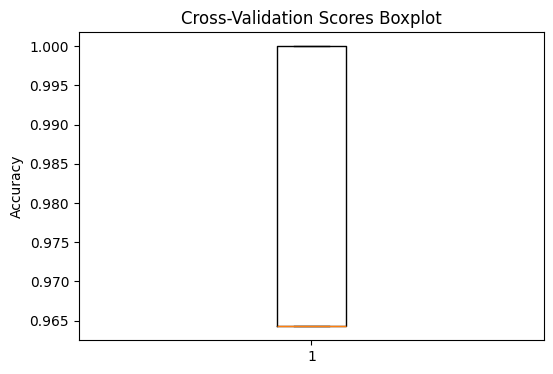

In [42]:
cv_scores = cross_val_score(best_knn_classifier, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

plt.figure(figsize=(6, 4))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores Boxplot')
plt.ylabel('Accuracy')
plt.savefig('../plots/knn/cross_validation_knn.png')
plt.show()

#### Step 11: Feature Engineering - PCA

In [12]:
pca = PCA(n_components=10)  # Choose an appropriate number of components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Use X_train_pca and X_test_pca for modeling and evaluation

#### Step 12: Ensemble Methods - Random Forest

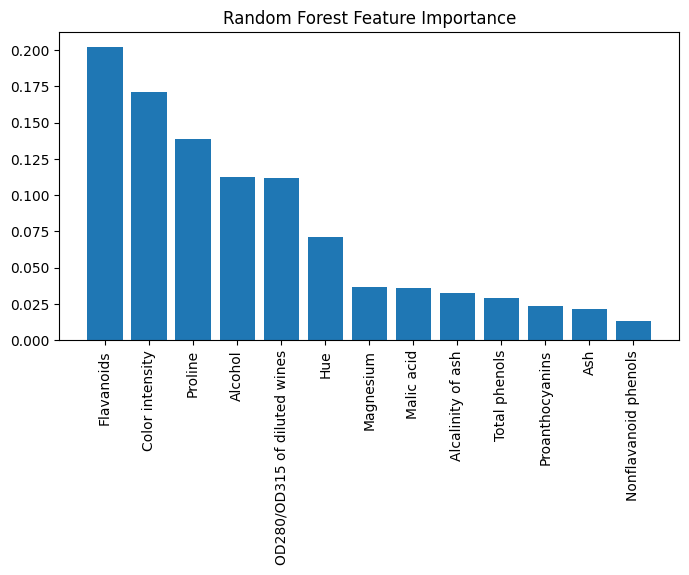

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Confusion Matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [44]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Visualize feature importances
plt.figure(figsize=(8, 4))
plt.bar(range(X_train_scaled.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), X_train.columns[indices], rotation=90)
plt.title('Random Forest Feature Importance')
plt.savefig('../plots/knn/feature_importance_random_forest_knn.png')
plt.show()

# Make predictions and evaluate
y_pred_rf = rf_classifier.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

#### Step 13: Handling Class Imbalance - SMOTE

In [14]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Use X_resampled and y_resampled for modeling

#### Step 14: Advanced Visualization - Decision Boundaries

Feature 1: Class - Index: 0
Feature 2: Alcohol - Index: 1


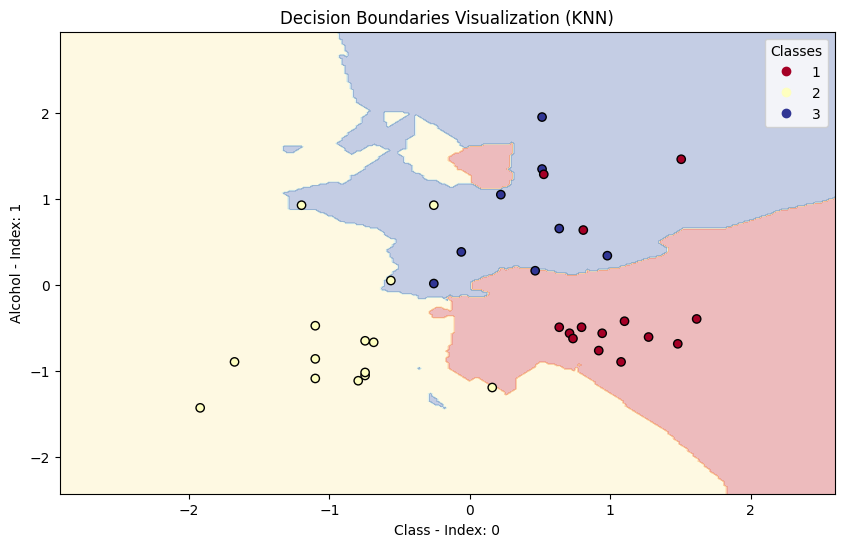

In [45]:
# Assuming X_test_scaled, y_test, and knn_classifier are defined from the kNN code

# Set the feature indices for visualization
feature1_index = 0  # Index of the first feature to visualize
feature2_index = 1  # Index of the second feature to visualize

# Identify the actual feature names
feature1_name = column_names[feature1_index]
feature2_name = column_names[feature2_index]

print(f'Feature 1: {feature1_name} - Index: {feature1_index}')
print(f'Feature 2: {feature2_name} - Index: {feature2_index}')

# Create a meshgrid for decision boundary visualization
h = 0.02  # step size in the mesh
x_min, x_max = X_test_scaled[:, feature1_index].min() - 1, X_test_scaled[:, feature1_index].max() + 1
y_min, y_max = X_test_scaled[:, feature2_index].min() - 1, X_test_scaled[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use all features for visualization (assuming X_train_scaled contains all features used for training)
X_train_2d = X_train_scaled[:, [feature1_index, feature2_index]]
X_test_2d = X_test_scaled[:, [feature1_index, feature2_index]]

# Train a new kNN classifier on the selected features
knn_classifier_2d = KNeighborsClassifier(n_neighbors=5)
knn_classifier_2d.fit(X_train_2d, y_train)

# Obtain predictions for each point in the meshgrid
Z = knn_classifier_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3)

# Plot data points
scatter = plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=y_test, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.legend(*scatter.legend_elements(), title='Classes')

plt.title('Decision Boundaries Visualization (KNN)')
plt.xlabel(f'{feature1_name} - Index: {feature1_index}')
plt.ylabel(f'{feature2_name} - Index: {feature2_index}')
plt.savefig('../plots/knn/decision_boundaries_visualization_knn.png')
plt.show()